In [1]:
from sklearn.linear_model import SGDClassifier
from skmultiflow.core import Pipeline
from skmultiflow.data import WaveformGenerator
from skmultiflow.evaluation import EvaluateHoldout
%matplotlib notebook

    This demo runs a holdout evaluation task with one learner. The default 
    stream is a WaveformGenerator. The default learner is a SGDClassifier, 
    which is inserted into a Pipeline structure. All the default values can 
    be changing by uncommenting/commenting the code below.
    
    Parameters
    ----------
    output_file: string
        The name of the csv output file
    
    instances: int
        The evaluation's max number of instances

In [2]:
# Setup stream
stream = WaveformGenerator()

In [3]:
# Setup the classifier
classifier = SGDClassifier()

In [6]:
# Setup the pipeline
pipe = Pipeline([('Classifier', classifier)])

# Setup the evaluator
evaluator = EvaluateHoldout(test_size=2000, dynamic_test_set=True, max_samples=400000, batch_size=1,
                            n_wait=15000, max_time=1000, output_file='test_holdout.csv', show_plot=True,
                            metrics=['kappa', 'kappa_t'])

<IPython.core.display.Javascript object>


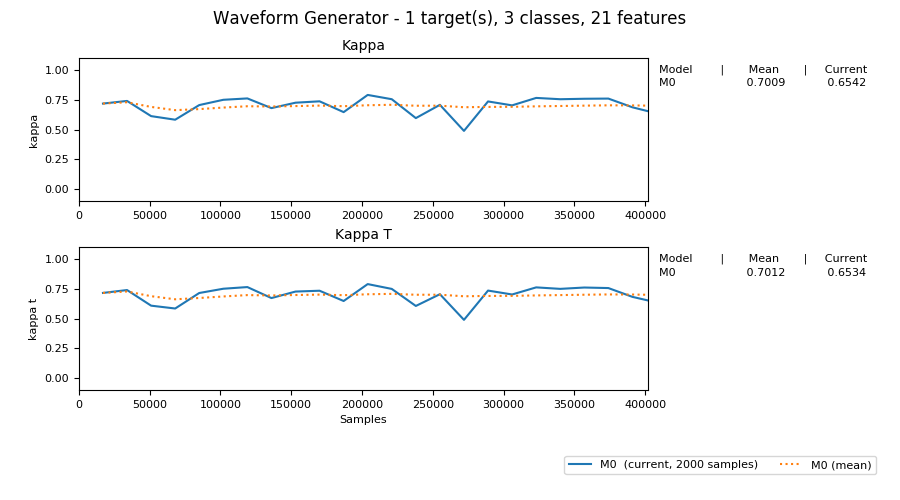

Holdout Evaluation
Evaluating 1 target(s).
Evaluating...
 -------------------- [0%] [0.00s]Separating 2000 holdout samples.
 #------------------- [5%] [40.50s]Separating 2000 holdout samples.
 ##------------------ [10%] [81.40s]Separating 2000 holdout samples.
 ###----------------- [15%] [122.90s]Separating 2000 holdout samples.
 ####---------------- [20%] [163.98s]Separating 2000 holdout samples.
Separating 2000 holdout samples.
Separating 2000 holdout samples.
 ######-------------- [30%] [242.48s]Separating 2000 holdout samples.
 #######------------- [35%] [283.86s]Separating 2000 holdout samples.
 ########------------ [40%] [324.14s]Separating 2000 holdout samples.
 #########----------- [45%] [364.57s]Separating 2000 holdout samples.
 ##########---------- [50%] [404.99s]Separating 2000 holdout samples.
Separating 2000 holdout samples.
Separating 2000 holdout samples.
 ############-------- [60%] [481.60s]Separating 2000 holdout samples.
 #############------- [65%] [521.98s]Separating

[Pipeline(steps=[('Classifier',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False))])]

In [7]:
# Evaluate
evaluator.evaluate(stream=stream, model=pipe)